In [5]:
import numpy as np
import os

In [6]:
count=0
for image in os.listdir('./Images'):
    count+=1

In [7]:
print(count)

13233


In [8]:
image_dict={}

In [9]:
# import matplotlib.image as mpimg
# from PIL import Image

# import cv2
# for image in os.listdir('./Images'):
#     img=mpimg.imread('./Images/'+image)
#     plt.imshow(img)


In [10]:
import cv2
import matplotlib.pyplot as plt

In [11]:
count=0
for image in os.listdir('./Images'):
    img = plt.imread('./Images/'+image)
    name=image.split('_')
    img=cv2.resize(img,(100,100))
    n=''
    for i in range(0,len(name)-1):
        if i == len(name)-2:
            n+=name[i]
        else:
            n+=name[i]+" "
            
    if n in image_dict:
        l=image_dict[n]
        l.append(img)
        image_dict[n]=l
    else:
        l=[]
        l.append(img)
        image_dict[n]=l
    count+=1
    if count==3000:
        break
#     print(type(img))

In [12]:
print(image_dict['Michael J Fox'])

[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 1, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 0, 2],
        [1, 0, 3],
        [1, 0, 4]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)]


In [13]:
# image='Michael_J_Fox_0001.jpg'
# name=image.split('_')

In [14]:
# print(name)

In [15]:

# print(n)

In [16]:
# Convert face list to numpy array
face_data = np.asarray(image_dict['Michael J Fox'])
print(face_data.shape)
face_data = face_data.reshape((face_data.shape[0], -1))
print (face_data.shape)
    

(1, 100, 100, 3)
(1, 30000)


In [17]:
for key in image_dict.keys():
    image_dict[key]= np.asarray(image_dict[key])
#     image_dict[key] = image.reshape((face_data.shape[0], -1))

In [18]:
image_dict['Michael J Fox'].shape

(1, 100, 100, 3)

In [16]:
for key in image_dict.keys():
    np.save("./Files/"+key+".npy", image_dict[key])

## Loading Data into Memory

In [19]:
face_data = []
labels  = []

In [20]:

class_id = 0
names ={}

for fx in os.listdir("./Files/"):
    if fx.endswith(".npy"):
        #Create a mapping btw class_id and name
        names[class_id] = fx[:-4]
#         print("loaded" , fx)
        data_item = np.load("./Files/"+fx)
        face_data.append(data_item)
        
        
        #Create Labels for the class
        target = class_id*np.ones((data_item.shape[0],))
        class_id+=1
        labels.append(target)

In [21]:
face_data[1].shape

(2, 100, 100, 3)

In [22]:
X  = np.concatenate(face_data,axis = 0)
Y = np.concatenate(labels,axis =0).reshape((-1,1))

In [23]:
X.shape

(3000, 100, 100, 3)

In [24]:
names

{0: 'Janet Leigh',
 1: 'Nursultan Nazarbayev',
 2: 'Kirk Johnson',
 3: 'Yu Shyi-kun',
 4: 'Jim Hardin',
 5: 'Leonid Kuchma',
 6: 'James Kirtley',
 7: 'Frank Taylor',
 8: 'Tim Chapman',
 9: 'Matthew Broderick',
 10: 'Leticia Dolera',
 11: 'Shawn Marion',
 12: 'Mark Gottfried',
 13: 'Cristina Torrens Valero',
 14: 'Nicolas Massu',
 15: 'Horst Koehler',
 16: 'Rita Wilson',
 17: 'Tony Stewart',
 18: 'Kent McCord',
 19: 'Alison Lohman',
 20: 'Sybille Schmid',
 21: 'Bart Freundlich',
 22: 'Brad Garrett',
 23: 'Robert Douglas',
 24: 'Ahmet Demir',
 25: 'Carlos Juarez',
 26: 'Angela Bassett',
 27: 'Franz Fischler',
 28: 'Arnold Schwarzenegger',
 29: 'Anette Hosoi',
 30: 'King Bhumibol Adulyadej',
 31: 'Carolina Moraes',
 32: 'Manfred Stolpe',
 33: 'Terry Semel',
 34: 'Yao Ming',
 35: 'Hedayat Amin Arsala',
 36: 'James Baker',
 37: 'Catherine Zeta-Jones',
 38: 'Jan De Bont',
 39: 'Art Cooper',
 40: 'Gerry Parsky',
 41: 'Clare Short',
 42: 'Alejandro Lembo',
 43: 'Brian Van Dusen',
 44: 'Fred Sw

### KNN

In [25]:
def dist(x1,y1):
    return np.sqrt(np.sum((x1-y1)**2))

def knn(X,Y,query_point, k=5):
    vals = []
    
    m = X.shape[0]
    
    for i in range(m):
        dis = dist(query_point,X[i])
        vals.append((dis,Y[i]))
        
    vals = sorted(vals)
    
    vals = vals[:k]
    vals = np.array(vals)
    
    counts = np.unique(vals[:,1], return_counts=True)
    predict = counts[0][counts[1].argmax()]
    
    return predict

### Real time face recognition

In [26]:
# cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

In [25]:

while True:
    res,frame = cap.read()
    
    if res == False:
        continue
        
    faces = face_cascade.detectMultiScale(frame,1.2,5)
    
    if len(faces)==0:
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)



        
    for face in faces:
        x,y,w, h = face
        
        
        
        offset = 10
        
        face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
        
        if np.all(np.array(face_section.shape)):
            face_section = cv2.resize(face_section,(100,100))


#         Predict label

            out = knn(X,Y,face_section)


            pred_name = names[int(out)]

            cv2.putText(frame, pred_name,(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2, cv2.LINE_AA)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        

        
    cv2.imshow("Faces",frame)
    

    key_pressed = cv2.waitKey(1) & 0xFF
    
    if key_pressed == ord('q'):
        break

cap.release()
cv2.destroyAllWindows() 

### Recognition through Image

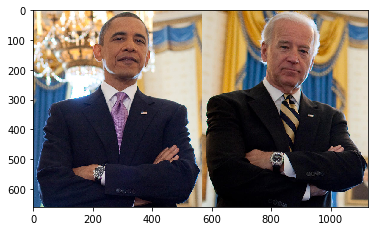

In [32]:
frame = plt.imread('./'+'two_people.jpg')
plt.imshow(frame)

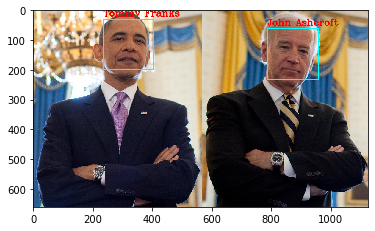

In [33]:
# while True:
#     frame = plt.imread('./'+'two_people.jpg')
    
#     if res == False:
#         continue
        
faces = face_cascade.detectMultiScale(frame,1.2,5)
    
if len(faces)==0:
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)



        
for face in faces:
    x,y,w, h = face
        
        
        
    offset = 10
        
    face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
        
    if np.all(np.array(face_section.shape)):
        face_section = cv2.resize(face_section,(100,100))


#         Predict label

        out = knn(X,Y,face_section)


        pred_name = names[int(out)]

        cv2.putText(frame, pred_name,(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2, cv2.LINE_AA)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        
plt.imshow(frame)
        
# cv2.imshow("Faces",frame)
    

#     key_pressed = cv2.waitKey(1) & 0xFF
    
#     if key_pressed == ord('q'):
#         break